<a href="https://colab.research.google.com/github/ssnirgudkar/Datasetpaper-final/blob/main/deeplab2_Finalpaper_submission_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use this version as the most final


## we have to keep batchsize = 2 or more. It does not run with batch size 1. Image will be resized to 512*512
##changed mask datatype to uint16 from uint8. segments.ai masks are uint16. else it reads masks as 0
##the resize was changed to nearest. but we can check if thats needed. bilinear is default. So we can try to keep it as bilinera and that shld also work. With this run, objects were not coming up well. objects and background was getting mixed



# https://keras.io/examples/vision/deeplabv3_plus/

In [ ]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import backend as K
print(K.image_data_format()) # print current format
#K.set_image_data_format('channels_last') # set format

channels_last


In [ ]:
# remove files 
#!ls /content/drive/MyDrive/InferenceLarge20192020shuffled/deeplab/program/*runrevised*.png 
#!ls /content/drive/MyDrive/InferenceLarge20192020shuffled/deeplab/picture/*runrevised*.png 

#!rm /content/drive/MyDrive/InferenceLarge20192020shuffled/deeplab/program/*runreviseddata*.png 
#!rm /content/drive/MyDrive/InferenceLarge20192020shuffled/deeplab/picture/*--runreviseddata-*.png 

#!rm /content/drive/MyDrive/InferenceLarge20192020shuffled/deeplab/program/*--test-*.png 
#!rm /content/drive/MyDrive/InferenceLarge20192020shuffled/deeplab/picture/*--test-*.png 

In [ ]:

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/test.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/testannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

'''
# Zip file with handpicked test images
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/select_test_images.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

# Zip file with masks of handpicked test images
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/select_test_masks.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

# copy the select_test_images and masks in test and testannot respectively 
!cp /content/drive/MyDrive/test_10_images/*.* /content/IRDatasetFinal/test
!cp /content/IRDatasetFinal/select_test_masks/*.png /content/IRDatasetFinal/testannot
'''

'\n# Zip file with handpicked test images\nzip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/select_test_images.zip", "r")\nzip_ref.extractall("/content/IRDatasetFinal")\nzip_ref.close()\n\n# Zip file with masks of handpicked test images\nzip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/select_test_masks.zip", "r")\nzip_ref.extractall("/content/IRDatasetFinal")\nzip_ref.close()\n\n# copy the select_test_images and masks in test and testannot respectively \n!cp /content/drive/MyDrive/test_10_images/*.* /content/IRDatasetFinal/test\n!cp /content/IRDatasetFinal/select_test_masks/*.png /content/IRDatasetFinal/testannot\n'

In [ ]:
# Code to use only for manual test images
!cp /content/drive/MyDrive/test_10_images/*.* /content/IRDatasetFinal/test

In [ ]:
import os 
APP_FOLDER = '/content/IRDatasetFinal/test'
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
   

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /content/IRDatasetFinal/test
Total number of files 4508
Total Number of directories 0
Total: 4508


In [ ]:
'''
# Now remove images that are not pure (rotated, mirrored etc from the test and testannot folders) 
# as we do not want to use them for testing 
import os
import sys
import shutil

test_dir = "/content/IRDatasetFinal/test"
test_mask_dir = "/content/IRDatasetFinal/testannot"
# Move rotated & mirrored files into tmp directory
# The format of these files is aXXX_XXX_XX.png and aXXX_XXX_XX_XX.png
# Number of underscores is 2 or 3
dest_test_dir = "/content/IRDatasetFinal/test_tmp"
dest_mask_dir = "/content/IRDatasetFinal/testannot_tmp"

# Move non-augmented files from test directory into a temporary directory
if (False == os.path.exists(dest_test_dir)):
  os.mkdir(dest_test_dir)
if (False == os.path.exists(dest_mask_dir)):
  os.mkdir(dest_mask_dir)


for eachFile in os.listdir(test_dir):
  numUnderscores = eachFile.count('_')
  if (numUnderscores > 1):
    # File names in image & mask directories are identical so move both files in one shot!
    shutil.move(os.path.join(test_dir, eachFile), os.path.join(dest_test_dir))
    shutil.move(os.path.join(test_mask_dir, eachFile), os.path.join(dest_mask_dir))
    
'''
    for eachFile in os.listdir(test_mask_dir):
      numUnderscores = eachFile.count('_')
      if (numUnderscores > 1):
        # File names in image & mask directories are identical so move both files in one shot!
        shutil.move(os.path.join(test_mask_dir, eachFile), os.path.join(dest_mask_dir))
'''
'''

"\n    for eachFile in os.listdir(test_mask_dir):\n      numUnderscores = eachFile.count('_')\n      if (numUnderscores > 1):\n        # File names in image & mask directories are identical so move both files in one shot!\n        shutil.move(os.path.join(test_mask_dir, eachFile), os.path.join(dest_mask_dir))\n"

In [ ]:
'''
# check if test images are present in train / validation folder 

# Zip file with masks of handpicked test images
import glob 


zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/train.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/val.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

import os
from os.path import exists

file_present = 0
for eachFile in os.listdir('/content/IRDatasetFinal/test'):
    filename = eachFile.split(".")[0]  
    #print("name of file", filename)
    
    count_train = 0 
    count_val = 0 
     
    for file in os.listdir("/content/IRDatasetFinal/train/"):
      if file.startswith(filename):
         #print("File exists in train directory", filename, os.path.join("/content/IRDatasetFinal/train/", file))
         count_train = 1 
      if count_train == 1:
        break 

    for file in os.listdir("/content/IRDatasetFinal/val/"):
      if file.startswith(filename):
        #print("File exists in val directory", filename, os.path.join("/content/IRDatasetFinal/val/", file))
        count_val = 1 
      if count_val ==1:
        break
    if count_train ==1 or count_val == 1:
      file_present = file_present + 1 
    else:
      print("files that are not present in train or val", filename)

print("total files from 325 that are either in val or train dir are", file_present)

'''
    if filename in glob.glob('/content/IRDatasetFinal/train/*[0-9].*') == True:
       print("test file exists in train directory", filename)
    
    if filename in glob.glob('/content/IRDatasetFinal/val/*[0-9].*'):
       print("test file exists in val directory", filename)
    

    #print("file train path", file_train_path)
    #print("file val path", file_val_path)

    if (os.path.isfile(file_train_path) is True): 
      print("test file exists in train directory", eachFile)
    else:
      print("No file found in train", eachFile)  

    if (os.path.isfile(file_val_path) is True):
      print("test file exists in val directory", eachFile)
    else:
      print("No file found in val", eachFile)  

    #print(os.path.isfile("/content/IRDatasetFinal/test/a1570555951_468803.png"))


'''   
'''  

In [ ]:
#!ls /content/IRDatasetFinal/test/a1603391930_493382.png

In [ ]:
'''
these are the files that were not in train or val.total files from 325 that are either in val or train dir are 286
a1603391930_493382
a1602782592_279944
a1635456565_019968
a1635456089_002472
a1635457245_031288
a1600888241_188905
a1635461259_005672
a1622943208_834271
a1635458544_023433
a1622942749_109772
a1622943039_769827
a1635457210_999884
a1635457743_9989
a1635456786_011603
a1604682965_453746
a1602782574_324635
a1622943519_360246
a1603387335_016333
a1635461209_007017
a1635461219_006688
a1635455953_006892
a1635452510_014722
a1635458124_004488
a1635458814_014660
a1635459559_024613
a1602782555_457181
a1635461448_999508
a1603392040_224361
a1603388439_014541
a1635456820_011965
a1571166212_314216
a1635459169_003060
a1635457894_011637
a1602782694_288267
a1602783133_252807
a1635453716_009826
a1635453590_013916
a1603210859_015065
a1622943419_195525
'''

In [ ]:
'''
# Count the number of images in test and testannot again
import os 
APP_FOLDER = '/content/IRDatasetFinal/test'
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
   

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))
'''

In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
IMAGE_SIZE_WIDTH = 640
IMAGE_SIZE_HEIGHT = 512

BATCH_SIZE = 4
NUM_CLASSES = 7
#DATA_DIR = '/content/drive/MyDrive/TheIRDatasetMini_backup'
DATA_DIR = '/content/IRDatasetFinal'
#DATA_DIR = '/content/drive/MyDrive/TheIRDataset'
#DATA_DIR = '/content/drive/MyDrive/IR -test'

#VAL_DATA_DIR = "./instance-level_human_parsing/instance-level_human_parsing/Training"
#NUM_TRAIN_IMAGES = 80
#NUM_VAL_IMAGES = 10


test_images = sorted(glob(os.path.join(DATA_DIR, "test/*")))
test_masks = sorted(glob(os.path.join(DATA_DIR, "testannot/*")))


def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    #print("image=", image)
    if mask:
        image = tf.image.decode_png(image, channels=0, dtype=tf.uint8)
        #print("mask 1st read", image)
        #print("Max value of mask as per tef.reduce are", tf.reduce_max(image))
        image.set_shape([None, None, 1])
        #print("mask 2nd read", image)
        image = tf.image.resize(images=image, method= 'nearest', size=[IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH])
        #print("mask 3rd read after resize", image)
        #print('final image' ,image)
        #print('unique values of tensor' , tf.unique(image))
    else:
        image = tf.image.decode_png(image, channels=3, dtype=tf.uint8)
        #print("1st step in read image", image)
        image.set_shape([None, None, 3])
        #print("2nd step in read image", image)
        image = tf.image.resize(images=image, method= 'bilinear', size=[IMAGE_SIZE_HEIGHT, IMAGE_SIZE_WIDTH])
        image = image / 127.5 - 1
        #print("image looks like", image)
    return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset




In [ ]:
'''
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output
'''

In [ ]:
'''
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        #weights="imagenet", include_top=False, input_tensor=model_input - removed imagenet weights
        weights=None, include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
model.summary()
'''

In [ ]:
'''
#### This is the training cell
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy"],
)

my_callbacks = [
    #tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-finalpapersubmission'),
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Models/deeplab-finalpapersubmission", save_freq = 'epoch')

]
history = model.fit(train_dataset, validation_data=val_dataset, callbacks = my_callbacks, epochs=25)
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
#plt.show()

plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
#plt.show()

plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
#plt.show()

plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
#plt.show()

model.save("/content/drive/MyDrive/Models/deeplab-finalpapersubmission")
'''

In [ ]:
## Inference 
## this is to use the saved model for predictions
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/deeplab-finalpapersubmission")
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/deeplab/deeplab-finalpapersubmission-2020only")
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/deeplab/deeplab-revisedcode-2020only")
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/deeplab/deeplab-7classes-finalpapersubmission_2019&2020_shuffled")

In [32]:
import PIL
#matplotlib.pyplot.ioff()

# Loading the Colormap. Defaulting since i have changed the colors hardcoded in the code
'''
colormap = loadmat(
   "/content/drive/MyDrive/deeplab/human_colormap.mat")["colormap"]
colormap = colormap * 100
colormap = colormap.astype(np.uint8)
print("shape of colormap", np.shape(colormap)) - (20,3)
print("type of colormap", type(colormap)) - ndarray 
'''

colormap = np.ndarray(shape=(7,3), dtype=int);
#colormap = np.zeros(7,3) 
#0 - sky - dark blue
colormap[0,0]=0
colormap[0,1]=113
colormap[0,2]=188

#1 - water - orange
colormap[1,0]= 216
colormap[1,1]= 82
colormap[1,2]= 24

#2 - bridge - yellow
colormap[2,0]= 236
colormap[2,1]= 176
colormap[2,2]= 31

#3 - obstacle - purple
colormap[3,0]= 125
colormap[3,1]= 46
colormap[3,2]= 141

#4 - living obstacle - green
colormap[4,0]= 118
colormap[4,1]= 171
colormap[4,2]= 47

#5 - backgnd - brown
colormap[5,0]= 161
colormap[5,1]= 19
colormap[5,2]= 46

#6 - self - red
colormap[6,0]= 255
colormap[6,1]= 0
colormap[6,2]= 0

def infer(model, image_tensor):
    #print("image tensor looks like", image_tensor)
    predictions = reconstructed_model.predict(np.expand_dims((image_tensor), axis=0))
    #print("predictions 1st step", predictions)
    predictions = np.squeeze(predictions)
    #print("predictions 2nd step after squeeze", predictions)
    predictions = np.argmax(predictions, axis=2)
    #print("predictions 3rd step after argmax", predictions)
    return predictions


def decode_segmentation_masks(mask, colormap, n_classes):
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    
    for l in range(0, n_classes):
        idx = mask == l
        r[idx] = colormap[l, 0]
        g[idx] = colormap[l, 1]
        b[idx] = colormap[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    #print(rgb)
    return rgb


def get_overlay(image, colored_mask):
    image = tf.keras.preprocessing.image.array_to_img(image)
    image = np.array(image).astype(np.uint8)
    overlay = cv2.addWeighted(image, 0.35, colored_mask, 0.65, 0)
    return overlay


#def plot_samples_matplotlib(display_list, figsize=(5, 3)):
def plot_samples_matplotlib(display_list, filename, index, start, figsize=(5, 3)):
    #_, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
    fig, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
    
    
    for i in range(len(display_list)):
        if display_list[i].shape[-1] == 3:
            #print("shape of display list", np.shape(tf.keras.preprocessing.image.array_to_img(display_list[i])))
            axes[i].imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        else:
            #print("shape of display list 2", np.shape(display_list[i]))
            axes[i].imshow(display_list[i])
    
    index_mod = index+start 
    #Saving the inferred segmented image as a picture 
    plt.savefig('/content/drive/MyDrive/InferenceLarge20192020shuffled-batch2/deeplab/picture/' + str(index_mod) +'--runreviseddata-3--' +  filename)
    
    #plt.cla()
    #plt.close(fig)
    
    #Displays the image on screen         
    #print (index)
    #plt.show()

#the below function is used only if you want to display a single image and not a subplot of image, mask, gtmask 
def imageormask(display_list, filename, index, start, figsize=(5, 3)):
    #_, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
    #fig, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
    
    
    for i in range(len(display_list)):
        if display_list[i].shape[-1] == 3:
            #print("shape of display list", np.shape(tf.keras.preprocessing.image.array_to_img(display_list[i])))
            plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        else:
            #print("shape of display list 2", np.shape(display_list[i]))
            plt.imshow(display_list[i])
    
    index_mod = index+start 
    #Saving the inferred segmented image as a picture 
    plt.savefig('/content/drive/MyDrive/InferenceReports/'+ 'mask'+ filename)
    
    #plt.cla()
    #plt.close(fig)
    
    #Displays the image on screen         
    #print (index)
    #plt.show()


def plot_predictions(images_list, masks_list, start, colormap, model):
    for (index, mask_file) in enumerate(masks_list):
      gt_mask_array = ((np.unique(cv2.imread(mask_file,cv2.IMREAD_UNCHANGED))))
      gt_mask = (cv2.imread(mask_file,cv2.IMREAD_UNCHANGED))
      #print ("mask file is", mask_file)
      filename = mask_file.split('/')[-1]
      #print(filename)
      object_living_array = [1]
      if((set(object_living_array) & set(gt_mask_array))== set(object_living_array)):
            image_tensor = read_image(images_list[index])
            #print("shape of image tensor", np.shape(image_tensor))
            prediction_mask = infer(image_tensor=image_tensor, model=reconstructed_model)
            #print(prediction_mask)

            output_Im = PIL.Image.fromarray(prediction_mask.astype(np.uint8))

            index_mod = index+start 

            ##Saving the category ids in an image for programatic IoU check 
            output_Im.save(('/content/drive/MyDrive/InferenceLarge20192020shuffled-batch2/deeplab/program/' + str(index_mod) +'--runreviseddata-3--' +  filename))

            prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 7)
            overlay = get_overlay(image_tensor, prediction_colormap)
            #print("shape of prediction mask is", np.shape(prediction_mask))
            #print("prediction colormap success")

            #want to get the gt mask displayed as well
            #print("shape of gt mask is", np.shape(gt_mask))
            gt_colormap = decode_segmentation_masks(gt_mask, colormap, 7)
            #print("gt colormap successful")
                              
            '''
            plot_samples_matplotlib(
              [image_tensor, overlay, prediction_colormap], filename, index, start, figsize=(18, 14) 
              )
            '''  
                       
            #adding gt mask to the plot                       
            plot_samples_matplotlib(
              [image_tensor, overlay, prediction_colormap,gt_colormap], filename, index, start, figsize=(18, 14) 
            )        
            
            '''
            #the below code is if you want to print an individual image and not a comb image, mask, gt
            imageormask(
              [gt_colormap], filename, index, start, figsize=(18, 14) 
            )
            '''

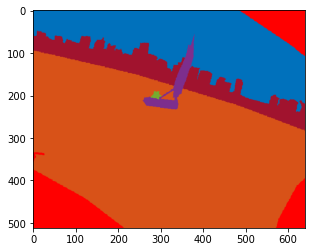

In [33]:
start = 2282
end = 2296
plot_predictions(test_images[start:end], test_masks[start:end], start, colormap, model=reconstructed_model)

In [ ]:
#This was a a trial to run w/o test masks 

def plot_predictions(images_list, start, colormap, model):
    for (index, image_file) in enumerate(images_list):
      #gt_mask_array = ((np.unique(cv2.imread(mask_file,cv2.IMREAD_UNCHANGED))))
      #gt_mask = (cv2.imread(mask_file,cv2.IMREAD_UNCHANGED))
      #print ("mask file is", mask_file)
      filename = image_file.split('/')[-1]
      #print(filename)
      object_living_array = [1]
      #if((set(object_living_array) & set(gt_mask_array))== set(object_living_array)):
      image_tensor = read_image(images_list[index])
      prediction_mask = infer(image_tensor=image_tensor, model=reconstructed_model)
      #print(prediction_mask)

      output_Im = PIL.Image.fromarray(prediction_mask.astype(np.uint8))

      index_mod = index+start 

      ##Saving the category ids in an image for programatic IoU check 
      #output_Im.save(('/content/drive/MyDrive/InferenceLarge20192020shuffled-batch2/deeplab/program/' + str(index_mod) +'--runall-1--' +  filename))
      output_Im.save('/content/drive/MyDrive/InferenceReports' +  filename)
      #prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 7)
      #overlay = get_overlay(image_tensor, prediction_colormap)
      #print("shape of prediction mask is", np.shape(prediction_mask))
      #print("prediction colormap success")

      #want to get the gt mask displayed as well
      #print("shape of gt mask is", np.shape(gt_mask))
      #gt_colormap = decode_segmentation_masks(gt_mask, colormap, 7)
      #print("gt colormap successful")

      
      
      #adding gt mask to the plot                       )
      plot_samples_matplotlib(
              [image_tensor, overlay, prediction_colormap], filename, index, start, figsize=(18, 14) 
                             )
      

In [ ]:

start = 0
end = 14
plot_predictions(test_images[start:end],  start, colormap, model=reconstructed_model)
